<a href="https://colab.research.google.com/github/yurepires/trabalho-02-ml/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import os

scaler = MinMaxScaler()

In [3]:
diabetes = pd.read_csv('diabetes_binary_5050.csv')
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
diabetes['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


# X e Y

In [8]:
X = diabetes.drop('Diabetes_binary', axis=1)
Y = diabetes['Diabetes_binary']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Regressão Logística

In [ ]:
rl = LogisticRegression(max_iter=1000)
rl.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred_rl = rl.predict(X_test)
accuracy_score(Y_test, pred_rl)

0.7509901923802339

In [ ]:
relatorio_rl = cross_validate(rl, X, Y, cv=10, scoring=['accuracy'])

In [ ]:
print(relatorio_rl['test_accuracy'])
print(np.mean(relatorio_rl['test_accuracy']))

[0.74031117 0.73719943 0.75357193 0.74409393 0.74451832 0.74678172
 0.75229877 0.75116707 0.75088414 0.75470364]
0.7475530130059669


In [ ]:
confusion_matrix(Y_test, pred_rl)

array([[7686, 2918],
       [2432, 8172]])

In [ ]:
print(classification_report(Y_test, pred_rl))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10604
         1.0       0.74      0.77      0.75     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, pred_knn)

In [ ]:
accuracy_knn

0.6961052433044135

In [ ]:
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69     10604
         1.0       0.69      0.72      0.70     10604

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.70     21208
weighted avg       0.70      0.70      0.70     21208



In [ ]:
confusion_matrix(Y_test, pred_knn)

array([[7129, 3475],
       [2970, 7634]])

In [ ]:
accuracys = {}
for i in range(3, 101, 2):
    accuracy_knn = 0
    for k in range(10):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        pred_knn = knn.predict(X_test)
        accuracy_knn += accuracy_score(Y_test, pred_knn)
    accuracys[i] = accuracy_knn/10
key = max(accuracys, key=accuracys.get)
print(f"K: {key}, valor: {accuracys[key]}")
knn = KNeighborsClassifier(n_neighbors=key)
knn.fit(X_train, Y_train)
pred_knn = knn.predict(X_test)
print(classification_report(Y_test, pred_knn))
print("\n")
confusion_matrix(Y_test, pred_knn)
plt.plot(accuracys.keys(), accuracys.values())
plt.xlabel("K")
plt.ylabel("Acurácia")
plt.show()

K: 10, valor: 0.6972078579642214
K: 20, valor: 0.714706330787071
K: 30, valor: 0.7223309895607712
K: 40, valor: 0.725032887582354
K: 50, valor: 0.726942562332138
K: 60, valor: 0.727932733373978
K: 70, valor: 0.7289229944557416
K: 80, valor: 0.7298141475930426
K: 90, valor: 0.7295170978812006
K: 100, valor: 0.7288098382822944
K: 110, valor: 0.7284986503015437
K: 120, valor: 0.7286401110252286
K: 130, valor: 0.7293473926338938
K: 140, valor: 0.728781555741816
K: 150, valor: 0.7291210722834505
K: 160, valor: 0.7298000813560732
K: 170, valor: 0.7288947239205863
K: 180, valor: 0.7290220303682653
K: 190, valor: 0.7290362166584663
K: 200, valor: 0.7285976862140673
K: 210, valor: 0.7283430873249198
K: 220, valor: 0.728130905243385
K: 230, valor: 0.7276075271775505
K: 240, valor: 0.7273528902715464
K: 250, valor: 0.7271831350020599
K: 260, valor: 0.726956798644519
K: 270, valor: 0.7269002355644494
K: 280, valor: 0.7268153639323677
K: 290, valor: 0.7276216634455717
K: 300, valor: 0.7265324144725

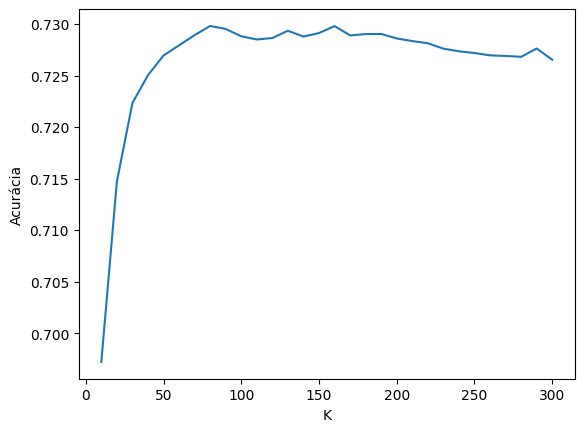

In [ ]:
accuracys = {}
for i in range(10, 301, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    relatorio_knn = cross_validate(knn, X, Y, cv=10, scoring=['accuracy'])
    accuracys[i] = np.mean(relatorio_knn['test_accuracy'])
    print(f"K: {i}, valor: {accuracys[i]}")
key = max(accuracys, key=accuracys.get)
print(f"Maior - K: {key}, valor: {accuracys[key]}")
knn = KNeighborsClassifier(n_neighbors=key)
knn.fit(X_train, Y_train)
pred_knn = knn.predict(X_test)
print(classification_report(Y_test, pred_knn))
print("\n")
confusion_matrix(Y_test, pred_knn)
plt.plot(accuracys.keys(), accuracys.values())
plt.xlabel("K")
plt.ylabel("Acurácia")
plt.show()

K: 70, valor: 0.7289229944557416
K: 71, valor: 0.7290785854447862
K: 72, valor: 0.7287532171764961
K: 73, valor: 0.7297009874178211
K: 74, valor: 0.729828313874372
K: 75, valor: 0.7300546362257025
K: 76, valor: 0.7292058898915779
K: 77, valor: 0.730167814408909
K: 78, valor: 0.7300263596878855
K: 79, valor: 0.7298707727006154
K: 80, valor: 0.7298141475930426
K: 81, valor: 0.7301112433252904
K: 82, valor: 0.7299273277771363
K: 83, valor: 0.7300121834021205
K: 84, valor: 0.7298424381370701
K: 85, valor: 0.7298848629482313
K: 86, valor: 0.7296868291400407
K: 87, valor: 0.7299273317789108
K: 88, valor: 0.7297292819636227
K: 89, valor: 0.7300971010546077
K: 90, valor: 0.7295170978812006
K: 150, valor: 0.7291210722834505
K: 151, valor: 0.7297717868102717
K: 152, valor: 0.7292625270044739
K: 153, valor: 0.7297859310818418
K: 154, valor: 0.7291918556688035
K: 155, valor: 0.7292908255520498
K: 156, valor: 0.7293049818289429
K: 157, valor: 0.7295454604571667
K: 158, valor: 0.7291493288123954
K: 

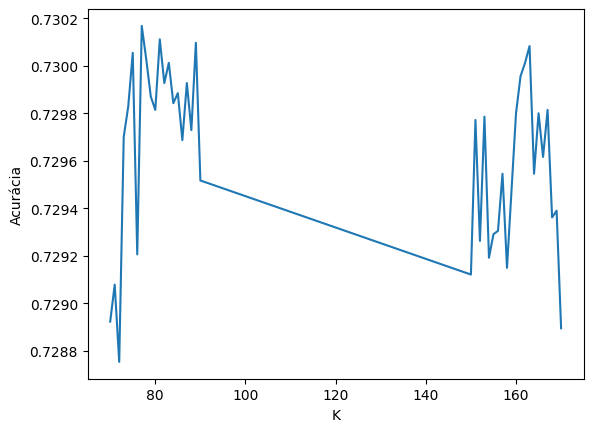

In [ ]:
values = np.concatenate((np.arange(70,91), np.arange(150, 171)))
accuracys = {}
for i in values:
    knn = KNeighborsClassifier(n_neighbors=i)
    relatorio_knn = cross_validate(knn, X, Y, cv=10, scoring=['accuracy'])
    accuracys[i] = np.mean(relatorio_knn['test_accuracy'])
    print(f"K: {i}, valor: {accuracys[i]}")
key = max(accuracys, key=accuracys.get)
print(f"Maior - K: {key}, valor: {accuracys[key]}")
knn = KNeighborsClassifier(n_neighbors=key)
knn.fit(X_train, Y_train)
pred_knn = knn.predict(X_test)
print(classification_report(Y_test, pred_knn))
print("\n")
confusion_matrix(Y_test, pred_knn)
plt.plot(accuracys.keys(), accuracys.values())
plt.xlabel("K")
plt.ylabel("Acurácia")
plt.show()

# Random Forest

N: 160, valor: 0.7384288413482538
N: 170, valor: 0.7366181684959112
N: 180, valor: 0.7372405664671715
N: 190, valor: 0.7377781328240942
N: 200, valor: 0.7368586131090525
N: 210, valor: 0.73796200435273
N: 220, valor: 0.7383723042797176
N: 230, valor: 0.738414719086443
N: 240, valor: 0.7379054232646756
N: 250, valor: 0.7384287973287356
N: 260, valor: 0.7385703160781489
N: 270, valor: 0.7380751945412595
N: 280, valor: 0.738315617144642
N: 290, valor: 0.7376366761021838
N: 300, valor: 0.738725871051224
N: 310, valor: 0.7390653855919715
N: 320, valor: 0.7383297954312942
N: 330, valor: 0.7384429756153879
N: 340, valor: 0.7382590800761057
N: 350, valor: 0.7393200345032989
N: 360, valor: 0.7394473289456546
N: 370, valor: 0.7384854104309853
N: 380, valor: 0.737763976547201
N: 390, valor: 0.7388249149672965
N: 400, valor: 0.7386268471440237
N: 360, accuracy: 0.7394473289456546


              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72     10604
        

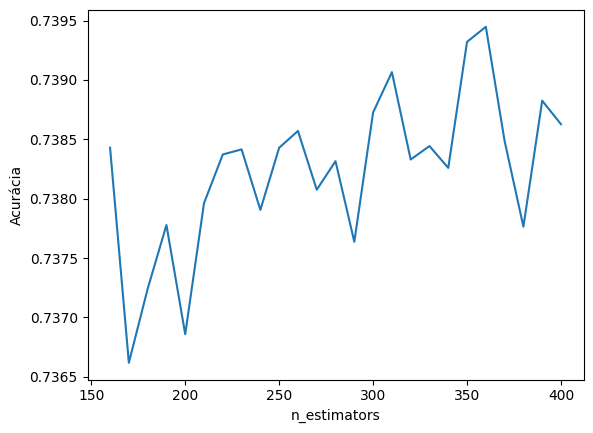

In [16]:
accuracys_rf = {}
for i in range(160, 401, 10):
    rf = RandomForestClassifier(n_estimators=i)
    relatorio_rf = cross_validate(rf, X, Y, cv=10, scoring=['accuracy'])
    accuracys_rf[i] = np.mean(relatorio_rf['test_accuracy'])
    print(f"N: {i}, valor: {accuracys_rf[i]}")
key_rf = max(accuracys_rf, key=accuracys_rf.get)
print(f"N: {key_rf}, accuracy: {accuracys_rf[key_rf]}")
print("\n")
rf = RandomForestClassifier(n_estimators=key_rf)
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)
print(classification_report(Y_test, pred_rf))
print("\n")
confusion_matrix(Y_test, pred_rf)
plt.plot(accuracys_rf.keys(), accuracys_rf.values())
plt.xlabel("n_estimators")
plt.ylabel("Acurácia")
plt.show()

N: 350, valor: 0.7387683058668213
N: 351, valor: 0.7378913010028647
N: 352, valor: 0.7382166532640573
N: 353, valor: 0.7371698531128702
N: 354, valor: 0.7378205696405786
N: 355, valor: 0.739334172772207
N: 356, valor: 0.7385844383399599
N: 357, valor: 0.7379479041006783
N: 358, valor: 0.7381742004404753
N: 359, valor: 0.7385703040728259
N: 360, valor: 0.7378771427250843
N: 361, valor: 0.7383722322477787
N: 362, valor: 0.7380610062501712
N: 363, valor: 0.7381600721760029
N: 364, valor: 0.7381317796310884
N: 365, valor: 0.7383156651659346
N: 366, valor: 0.7386268651520085
N: 367, valor: 0.7387258710512241
N: 368, valor: 0.7383439637135106
N: 369, valor: 0.7389239708886921
Maior - N: 355, valor: 0.739334172772207
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10604
         1.0       0.72      0.79      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted

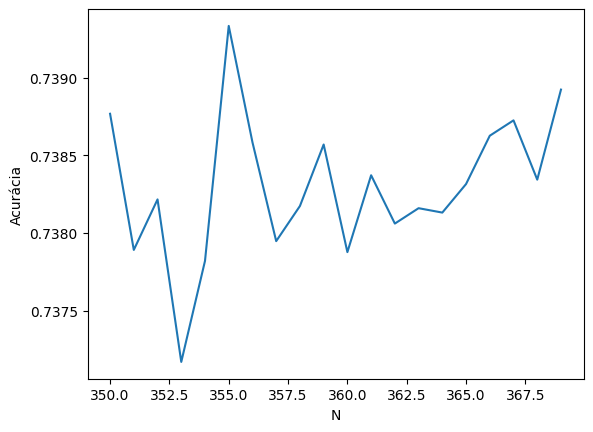

In [10]:
accuracys = {}
for i in range(350, 370):
    rf = RandomForestClassifier(n_estimators=i)
    relatorio_rf = cross_validate(rf, X, Y, cv=10, scoring=['accuracy'])
    accuracys[i] = np.mean(relatorio_rf['test_accuracy'])
    print(f"N: {i}, valor: {accuracys[i]}")
key = max(accuracys, key=accuracys.get)
print(f"Maior - N: {key}, valor: {accuracys[key]}")
rf = RandomForestClassifier(n_estimators=key)
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)
print(classification_report(Y_test, pred_rf))
print("\n")
confusion_matrix(Y_test, pred_rf)
plt.plot(accuracys.keys(), accuracys.values())
plt.xlabel("N")
plt.ylabel("Acurácia")
plt.show()

# SVM

In [ ]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [ ]:
pred_svm = svm.predict(X_test)
accuracy_score(Y_test, pred_svm)

0.7475952470765749

In [ ]:
confusion_matrix(Y_test, pred_svm)

array([[7338, 3266],
       [2087, 8517]])

In [ ]:
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10604
         1.0       0.72      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [10]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly', 'sigmoid', 'rbf', 'linear'],
    'degree': [2, 3, 4, 5]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', refit=True, verbose=3, n_jobs=1)
grid_search.fit(X_train, Y_train)

print("\n")
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
pred_best_svm = best_model.predict(X_test)
print(classification_report(Y_test, pred_best_svm))
print("\n")
confusion_matrix(Y_test, pred_best_svm)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.749 total time=  39.3s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.745 total time=  39.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.748 total time=  40.2s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.747 total time=  38.5s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.749 total time=  39.2s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.542 total time= 1.1min
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.544 total time= 1.1min
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.537 total time= 1.1min
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.538 total time= 1.1min
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, score=0.544 total time= 1.2min
[CV 1/5] END C=0.1, degree=2, gamma=scale, 

array([[7187, 3417],
       [1844, 8760]])

# Teste de todos com os melhores parâmetros

In [ ]:
knn = KNeighborsClassifier(n_neighbors=87)
svm = SVC()
rf = RandomForestClassifier(n_estimators=291)
rl = LogisticRegression(max_iter=1000)

In [ ]:
knn.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
rl.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
pred_knn = knn.predict(X_test)
pred_svm = svm.predict(X_test)
pred_rf = rf.predict(X_test)
pred_rl = rl.predict(X_test)

In [ ]:
print(f"KNN: {accuracy_score(Y_test, pred_knn)}")
print(f"SVM: {accuracy_score(Y_test, pred_svm)}")
print(f"RF: {accuracy_score(Y_test, pred_rf)}")
print(f"RL: {accuracy_score(Y_test, pred_rl)}")

KNN: 0.7283100716710675
SVM: 0.7476423990946812
RF: 0.7442003017729159
RL: 0.7502829121086383


In [ ]:
relatorio_knn = cross_validate(knn, X, Y, cv=10, scoring=['accuracy'])
relatorio_rf = cross_validate(rf, X, Y, cv=10, scoring=['accuracy'])
relatorio_svm = cross_validate(svm, X, Y, cv=10, scoring=['accuracy'])
relatorio_rl = cross_validate(rl, X, Y, cv=10, scoring=['accuracy'])

In [ ]:
relatorio_knn

{'fit_time': array([0.03843045, 0.02382565, 0.01885986, 0.01947546, 0.01991439,
        0.02735066, 0.01963592, 0.01990509, 0.0329833 , 0.01936436]),
 'score_time': array([3.61359572, 4.61135721, 3.5738349 , 3.48423481, 4.12891507,
        3.75358605, 3.49237442, 3.54940152, 4.49964452, 3.47123933]),
 'test_accuracy': array([0.72135785, 0.7155587 , 0.72853303, 0.72810864, 0.73574763,
        0.72909888, 0.73744518, 0.73772811, 0.72881596, 0.73687933])}

In [ ]:
relatorio_svm

{'fit_time': array([172.41426396, 175.63625336, 173.01702428, 176.44135499,
        171.399755  , 170.72615075, 169.8095386 , 176.29573941,
        171.35400438, 172.3350594 ]),
 'score_time': array([17.80958247, 18.90475416, 18.43076444, 17.83652878, 19.89090037,
        18.46311927, 17.82744837, 18.91781759, 18.01729202, 18.93660665]),
 'test_accuracy': array([0.74229137, 0.73620934, 0.75017683, 0.74168906, 0.74635733,
        0.7487622 , 0.75300608, 0.75272316, 0.75244023, 0.75908898])}

In [ ]:
relatorio_rf

{'fit_time': array([25.28079414, 24.8964324 , 25.57291698, 24.63186216, 25.17268729,
        24.53312325, 24.48766351, 24.55691147, 25.4029212 , 24.52824211]),
 'score_time': array([0.80200863, 0.82294178, 0.8317368 , 0.93809986, 0.97693849,
        0.8328526 , 0.81480193, 0.80367279, 0.80848598, 0.80713892]),
 'test_accuracy': array([0.73903819, 0.7251768 , 0.74324515, 0.72457208, 0.73829396,
        0.73857688, 0.74465978, 0.7453671 , 0.73588909, 0.74833781])}

In [ ]:
relatorio_rl

{'fit_time': array([10.06266022, 11.29059172, 11.56648469,  9.54936075, 10.36441112,
        11.20297933, 10.76948547, 11.80705523, 10.85052657, 12.15151954]),
 'score_time': array([0.01093125, 0.00384188, 0.00387502, 0.01195073, 0.00398159,
        0.00402641, 0.00376415, 0.01128316, 0.00379395, 0.00380993]),
 'test_accuracy': array([0.74031117, 0.73719943, 0.75357193, 0.74409393, 0.74451832,
        0.74678172, 0.75229877, 0.75116707, 0.75088414, 0.75470364])}

In [ ]:
print(f"KNN: {np.mean(relatorio_knn['test_accuracy'])}")
print(f"SVM: {np.mean(relatorio_svm['test_accuracy'])}")
print(f"RF: {np.mean(relatorio_rf['test_accuracy'])}")
print(f"RL: {np.mean(relatorio_rl['test_accuracy'])}")

KNN: 0.7299273317789108
SVM: 0.748274458895074
RF: 0.7383156851748065
RL: 0.7475530130059669
